In [1]:
import time
import numpy as np
np.random.seed(1)
import pandas as pd
import json
import matplotlib.pyplot as plt

use first  21240  points in a time series


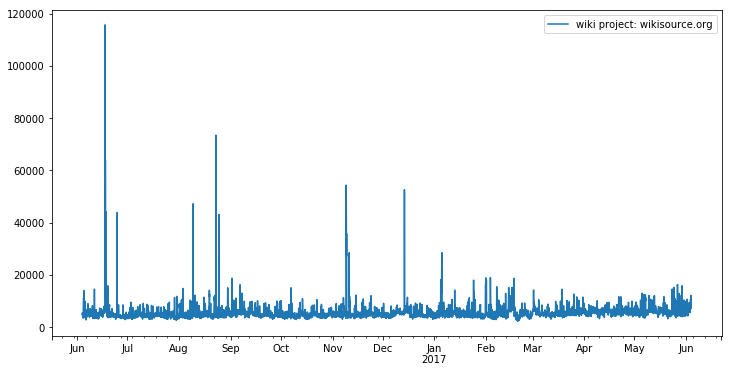

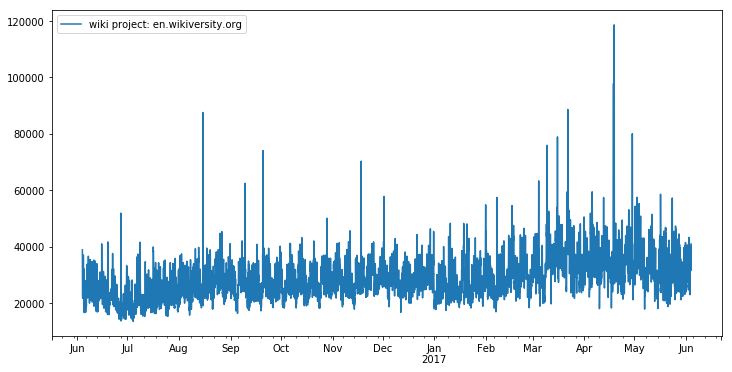

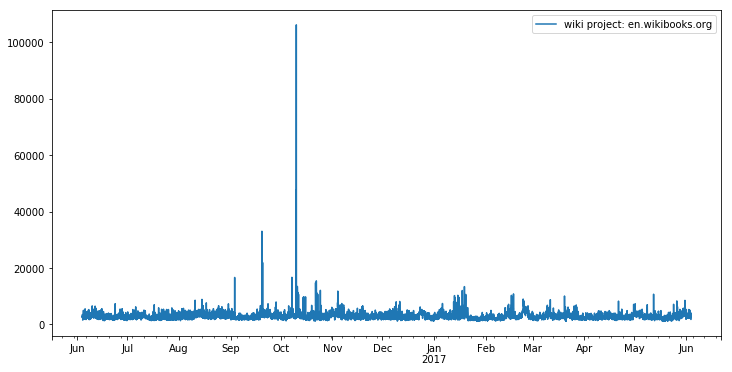

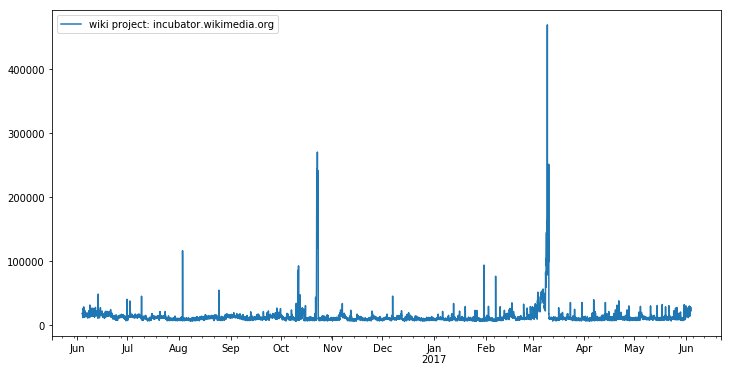

In [74]:
#data_location = "s3://{}/test/test.json".format(s3_data_path)
with open('wp.txt') as f:
    wp_list = f.read().splitlines()

label_location = 'wp.txt'    
data_location = 'train_shortlist.json'
df_ts = pd.read_json(data_location, lines=True)

num_pt = min(len(df_ts.iloc[1, 1]), 100000)
print('use first ', num_pt, ' points in a time series')
num_ts = len(df_ts)
freq = 'H'

prediction_length = 48
context_length = 72
day = 24
week = 148
month = 720
year = 8760


time_series_wiki = []
for k in range(num_ts):
    t0 = df_ts.iloc[k, 0]
    data = df_ts.iloc[k, 1][:num_pt]
    index = pd.DatetimeIndex(start=t0, freq=freq, periods=num_pt)
    time_series_wiki.append(pd.Series(data=data, index=index))


for k in [12,13,14,15]: # np.random.randint(low=0, high=num_ts-1, size=10):
    plt.figure(figsize=(12, 6))
    # time_series_wiki[k][-prediction_length-context_length:].plot(label='target')
    time_series_wiki[k][-year:].plot(label='wiki project: ' + wp_list[k])  # (label='wiki project: ' + wp_list[k])
    plt.legend()
    plt.show()


### Time domain analysis

In [91]:
label_location = 'wp.txt'    
data_location = 'train_shortlist.json'
    
def time_domain_analysis(ts, label, window_size):
    import time
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # straight up plot
    plt.figure(figsize=(12, 6))
    x.plot(label='wiki project: ' + label)
    plt.title('time series plot')
    plt.legend()
    plt.show()
    
    # autocorrelation
    plt.figure(figsize=(15,5))
    pd.plotting.autocorrelation_plot(ts);
    plt.title('autocorrelation')
    
    # rolling average
    plt.figure(figsize=(12, 6))
    ts.rolling(window=window_size, center=False).mean().plot()
    plt.title('Rolling average')
    
    # rolling autocorrelation
    plt.figure(figsize=(12, 6))
    ts.rolling(window=window_size).corr(other=ts).plot()
    plt.title('Rolling autocorr')

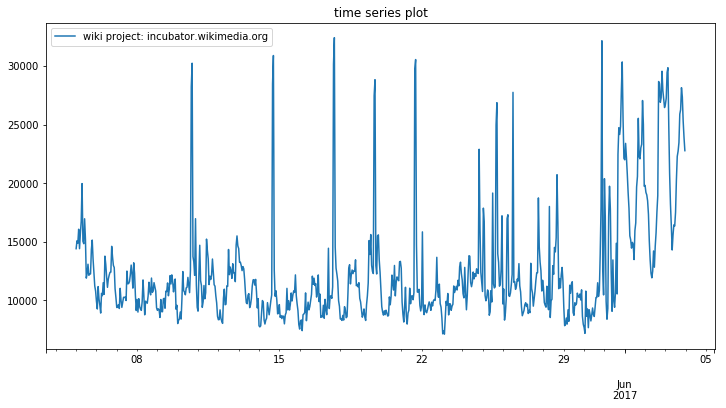

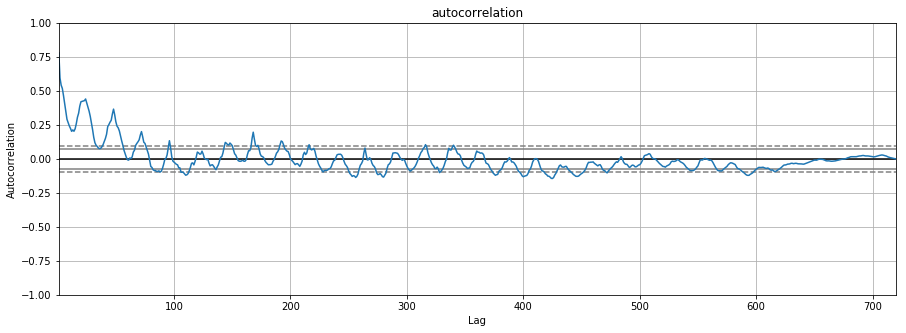

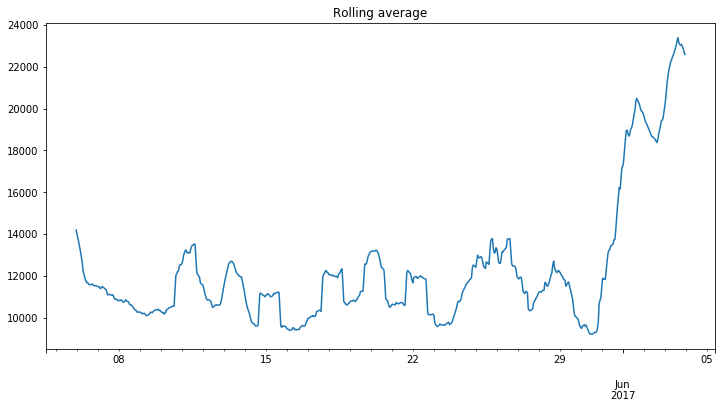

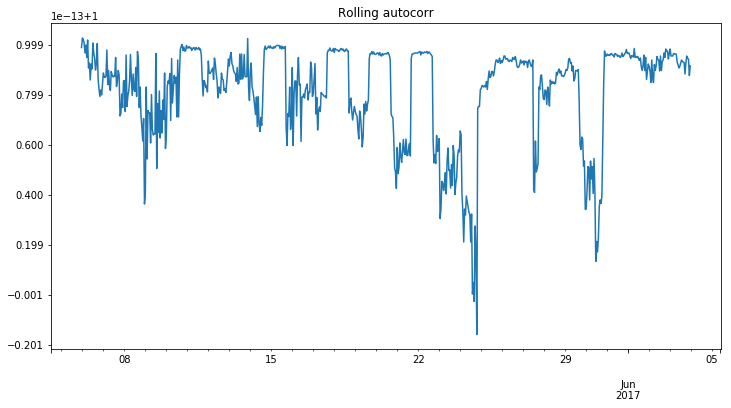

In [96]:
x = time_series_wiki[15][-month:]
label = wp_list[15]
time_domain_analysis(x, label, day)

### Frequency domain analysis

720


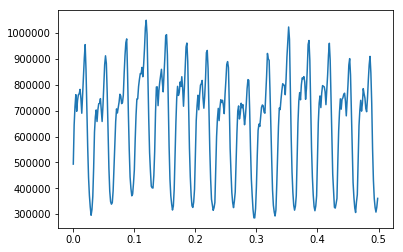

In [95]:
x
print(x.values.shape[-1])
Y = np.fft.fft(x.values) # fft computing and normalization
freq = np.fft.fftfreq(x.shape[-1])

plt.plot(freq[range(int(n/2))], y[range(int(n/2))])

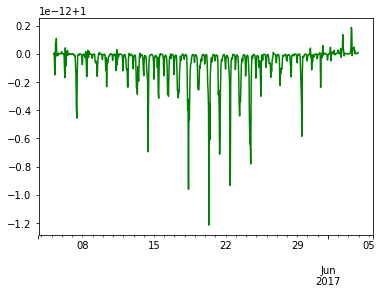

In [55]:
x.rolling(window=6).corr(other=x).plot(style='-g')

In [67]:
Fs = 1 # 150.0;  # sampling rate
Ts = len(x) # 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts)  # np.arange(0,1,Ts) # time vector

ff = 1 # 5;   # frequency of the signal
y = x.values # np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
print(type(n))
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
print(range(int(n/2)))
print(frq)

<class 'int'>
range(0, 360)
[0.         0.00138889 0.00277778 0.00416667 0.00555556 0.00694444
 0.00833333 0.00972222 0.01111111 0.0125     0.01388889 0.01527778
 0.01666667 0.01805556 0.01944444 0.02083333 0.02222222 0.02361111
 0.025      0.02638889 0.02777778 0.02916667 0.03055556 0.03194444
 0.03333333 0.03472222 0.03611111 0.0375     0.03888889 0.04027778
 0.04166667 0.04305556 0.04444444 0.04583333 0.04722222 0.04861111
 0.05       0.05138889 0.05277778 0.05416667 0.05555556 0.05694444
 0.05833333 0.05972222 0.06111111 0.0625     0.06388889 0.06527778
 0.06666667 0.06805556 0.06944444 0.07083333 0.07222222 0.07361111
 0.075      0.07638889 0.07777778 0.07916667 0.08055556 0.08194444
 0.08333333 0.08472222 0.08611111 0.0875     0.08888889 0.09027778
 0.09166667 0.09305556 0.09444444 0.09583333 0.09722222 0.09861111
 0.1        0.10138889 0.10277778 0.10416667 0.10555556 0.10694444
 0.10833333 0.10972222 0.11111111 0.1125     0.11388889 0.11527778
 0.11666667 0.11805556 0.11944444 

ValueError: x and y must have same first dimension, but have shapes (1,) and (720,)

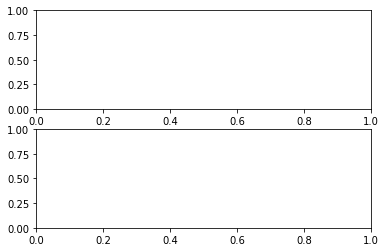

In [57]:
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')